In [1]:
# Supress warnings
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv("startup_data.csv")
df=pd.DataFrame(data)
df.describe(include='all')

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
count,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,500,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,Startup_500,EdTech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Private
freq,1,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,348
mean,NaN,NaN,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000,NaN,NaN
std,NaN,NaN,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128,NaN,NaN
min,NaN,NaN,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000,NaN,NaN
25%,NaN,NaN,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000,NaN,NaN
50%,NaN,NaN,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000,NaN,NaN
75%,NaN,NaN,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000,NaN,NaN


In [4]:
df.rename(columns={
    'Startup Name': 'Startup_Name',
    'Industry': 'Industry',
    'Funding Rounds': 'Funding_Rounds',
    'Funding Amount (M USD)': 'Funding_Amount',
    'Valuation (M USD)': 'Valuation',
    'Revenue (M USD)': 'Revenue',
    'Employees': 'Employees',
    'Market Share (%)': 'Market_Share',
    'Profitable': 'Profitable',
    'Year Founded': 'Year_Founded',
    'Region': 'Region',
    'Exit Status': 'Exit_Status'
}, inplace=True)
df.describe(include='all')

,Startup_Name,Industry,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Year_Founded,Region,Exit_Status
count,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,500,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,Startup_500,EdTech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Private
freq,1,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,348
mean,NaN,NaN,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000,NaN,NaN
std,NaN,NaN,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128,NaN,NaN
min,NaN,NaN,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000,NaN,NaN
25%,NaN,NaN,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000,NaN,NaN
50%,NaN,NaN,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000,NaN,NaN
75%,NaN,NaN,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000,NaN,NaN


In [5]:
df1=df.drop("Startup_Name", axis=1)
df1.describe(include="all")

,Industry,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Year_Founded,Region,Exit_Status
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,EdTech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,Private
freq,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,348
mean,NaN,2.958000,152.656760,1371.809180,49.321740,2532.092000,5.092940,0.432000,2006.044000,NaN,NaN
std,NaN,1.440968,86.683711,978.226579,29.267605,1385.434921,2.807646,0.495851,9.347128,NaN,NaN
min,NaN,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1990.000000,NaN,NaN
25%,NaN,2.000000,79.212500,557.027500,22.802500,1382.750000,2.760000,0.000000,1998.000000,NaN,NaN
50%,NaN,3.000000,156.005000,1222.580000,48.800000,2496.500000,5.135000,0.000000,2006.000000,NaN,NaN
75%,NaN,4.000000,226.450000,2052.085000,74.965000,3708.750000,7.552500,1.000000,2014.000000,NaN,NaN


In [6]:
df1.loc[df1.duplicated()]

,Industry,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Year_Founded,Region,Exit_Status


In [7]:
df1.shape

(500, 11)

In [8]:
latest_year=df1.Year_Founded.max()+1
print(latest_year)

2023


In [9]:
df1['Age']= latest_year- df1.Year_Founded
df1.head()

,Industry,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Year_Founded,Region,Exit_Status,Age
0,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private,17
1,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private,20
2,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private,28
3,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private,20
4,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired,26


In [10]:
df1.Revenue.describe()        

count    500.000000
mean      49.321740
std       29.267605
min        0.120000
25%       22.802500
50%       48.800000
75%       74.965000
max       99.710000
Name: Revenue, dtype: float64

In [11]:
revenue_mean_median= df1.Revenue.mean()- df1.Revenue.median()
print(revenue_mean_median*1000)

521.7400000000011


In [12]:
df1.Revenue.describe()
df1=df1.drop('Year_Founded', axis=1)

In [13]:
print(df1.dtypes)

Industry           object
Funding_Rounds      int64
Funding_Amount    float64
Valuation         float64
Revenue           float64
Employees           int64
Market_Share      float64
Profitable          int64
Region             object
Exit_Status        object
Age                 int64
dtype: object


In [14]:
print(df1.isnull().sum())
print((df1.isnull().sum()/len(df1))*100)  # % of missing values

Industry          0
Funding_Rounds    0
Funding_Amount    0
Valuation         0
Revenue           0
Employees         0
Market_Share      0
Profitable        0
Region            0
Exit_Status       0
Age               0
dtype: int64
Industry          0.0
Funding_Rounds    0.0
Funding_Amount    0.0
Valuation         0.0
Revenue           0.0
Employees         0.0
Market_Share      0.0
Profitable        0.0
Region            0.0
Exit_Status       0.0
Age               0.0
dtype: float64


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Industry        500 non-null    object 
 1   Funding_Rounds  500 non-null    int64  
 2   Funding_Amount  500 non-null    float64
 3   Valuation       500 non-null    float64
 4   Revenue         500 non-null    float64
 5   Employees       500 non-null    int64  
 6   Market_Share    500 non-null    float64
 7   Profitable      500 non-null    int64  
 8   Region          500 non-null    object 
 9   Exit_Status     500 non-null    object 
 10  Age             500 non-null    int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 43.1+ KB


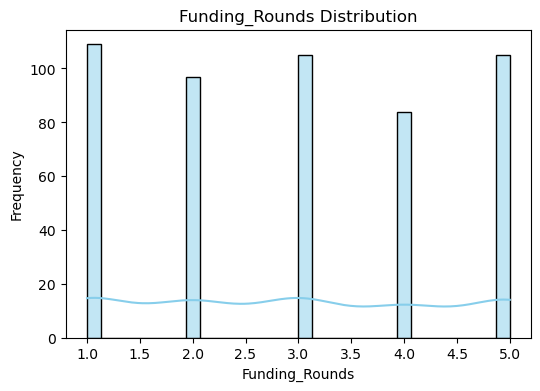

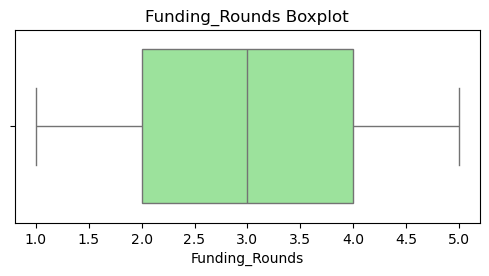

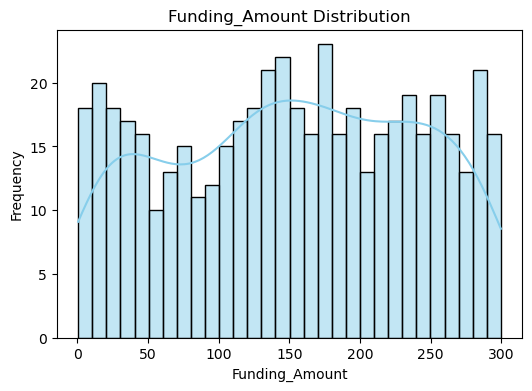

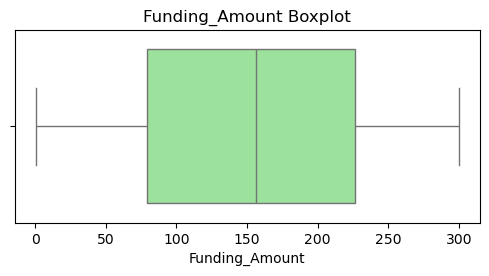

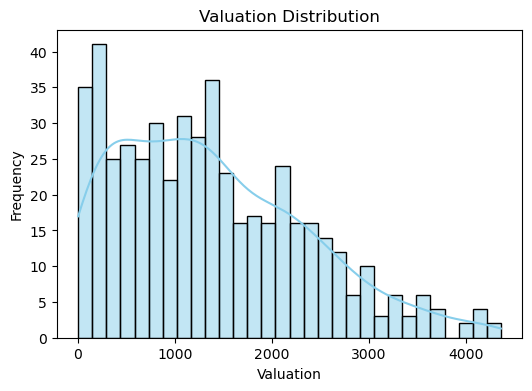

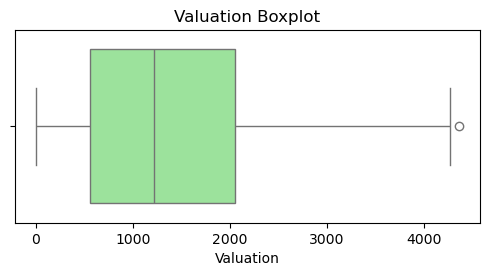

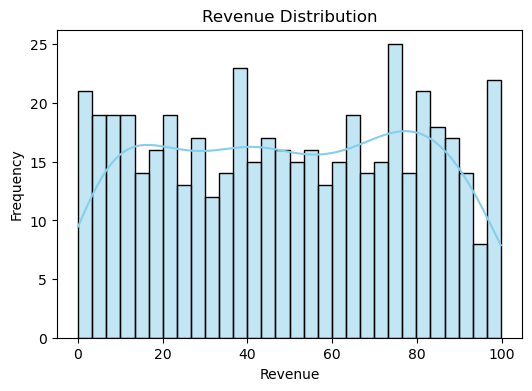

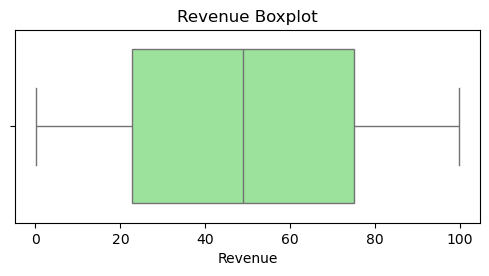

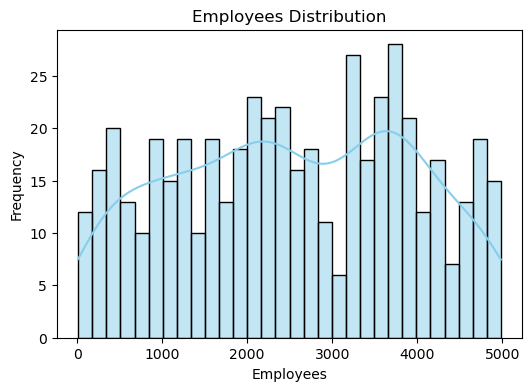

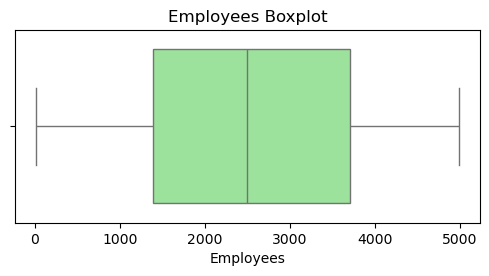

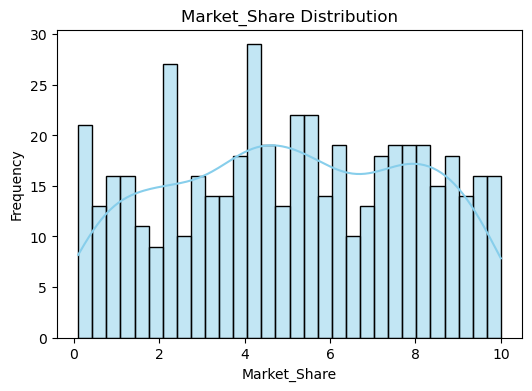

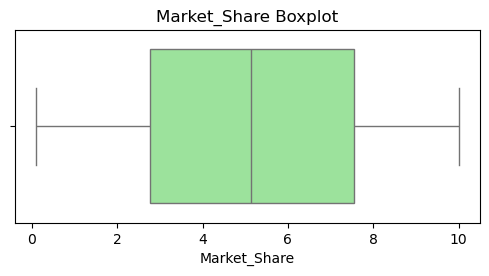

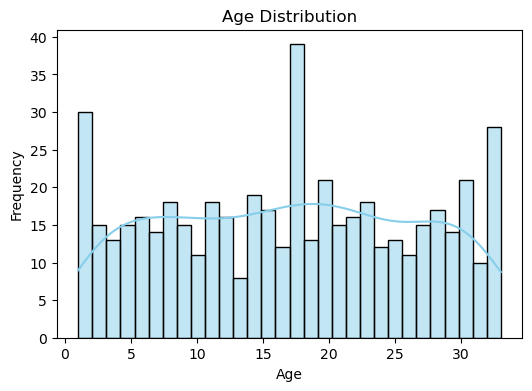

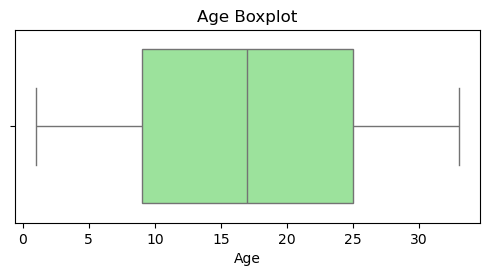

In [17]:
num_cols = [
    'Funding_Rounds',
    'Funding_Amount',
    'Valuation',
    'Revenue',
    'Employees',
    'Market_Share',
    'Age'
]


for col in num_cols:
    plt.figure(figsize=(6,4))
    
    # Histogram + KDE
    sns.histplot(df1[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=df1[col], color='lightgreen')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)
    plt.show()



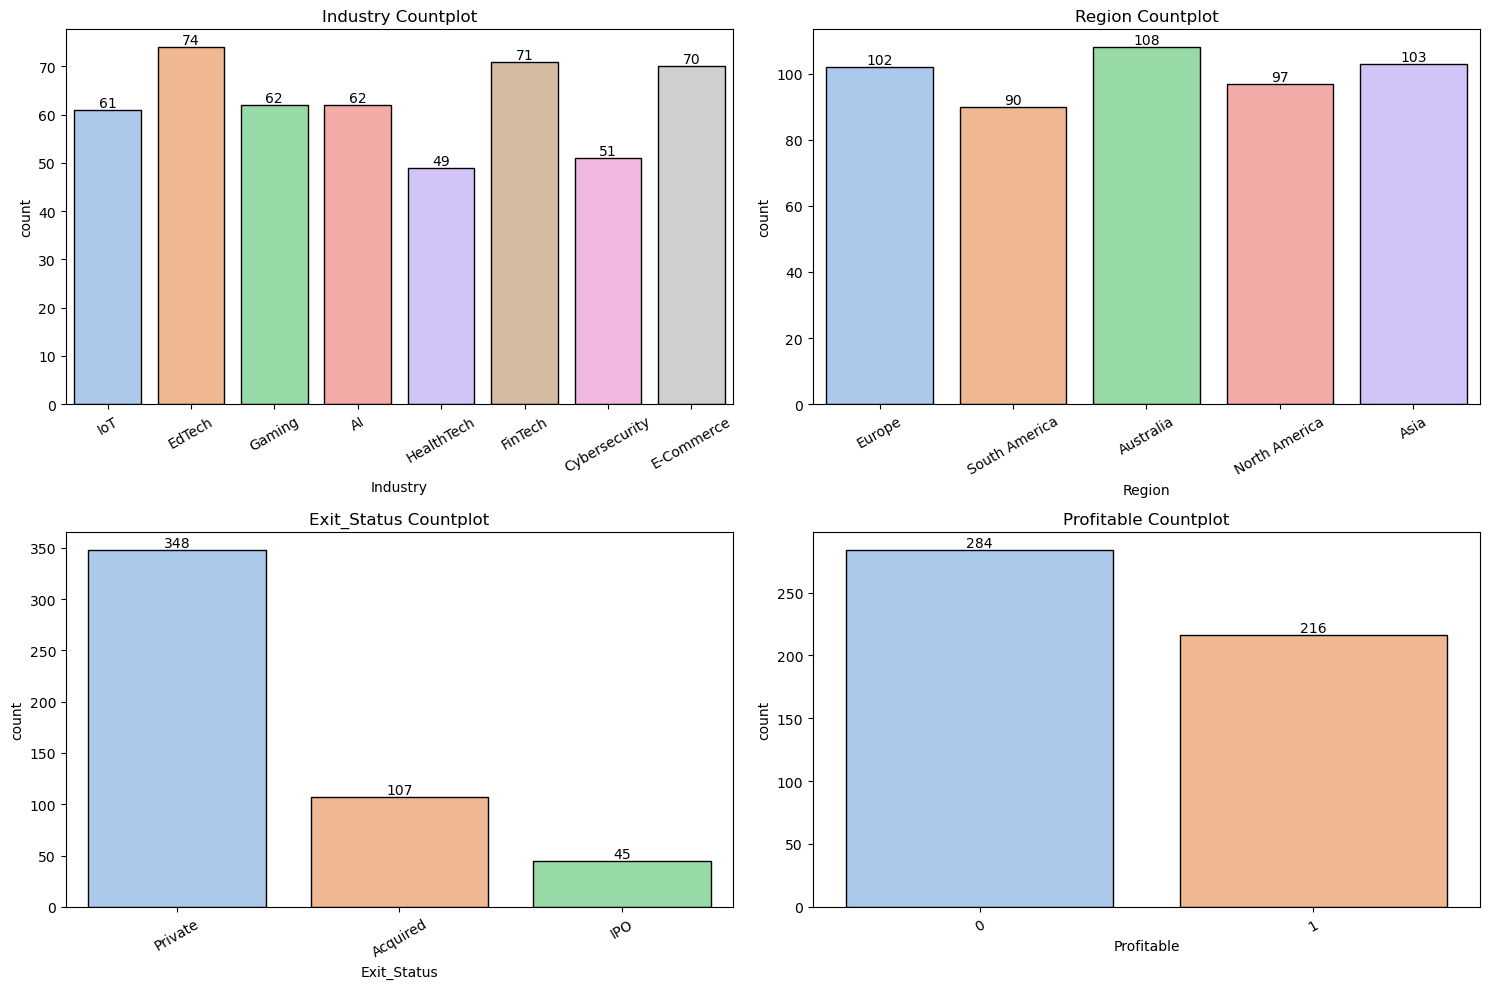

In [18]:
cat_cols = ['Industry','Region','Exit_Status','Profitable']

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(data=df1, x=col, palette="pastel", edgecolor="black")
    plt.title(f"{col} Countplot")
    plt.xticks(rotation=30)
    for cont in ax.containers:
        ax.bar_label(cont)
plt.tight_layout()
plt.show()



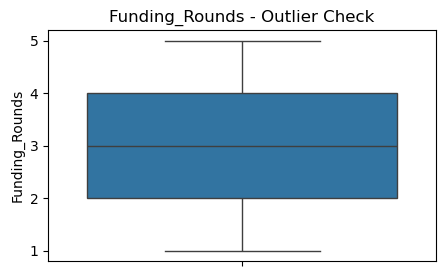

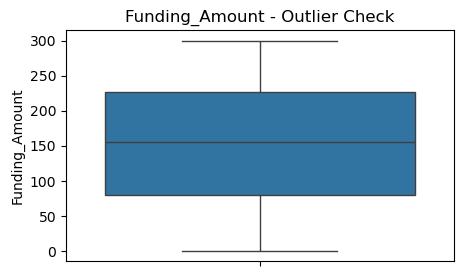

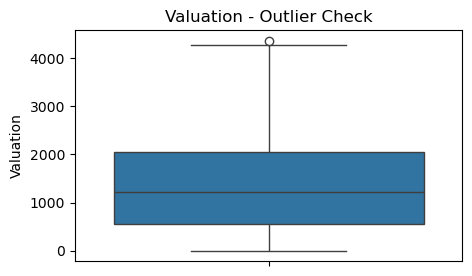

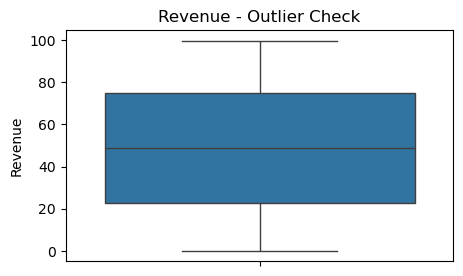

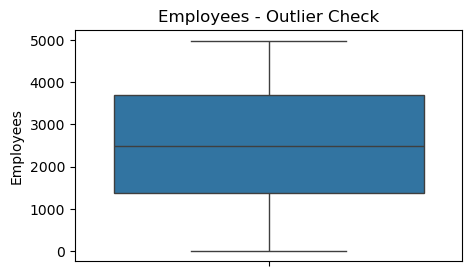

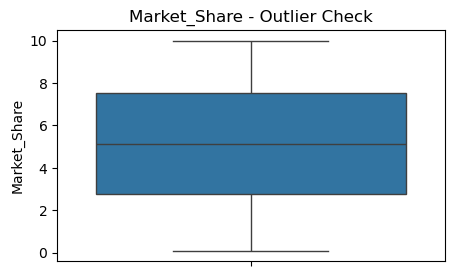

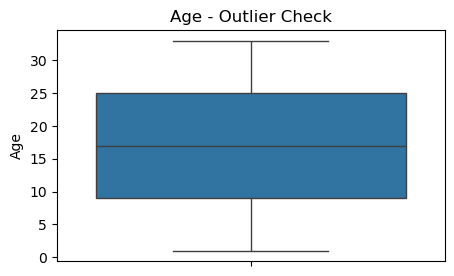

In [19]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(y=df1[col])
    plt.title(f'{col} - Outlier Check')
    plt.show()


In [ ]:
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)]
    print(f'{col}: {len(outliers)} outliers')


Funding_Rounds: 0 outliers
Funding_Amount: 0 outliers
Valuation: 1 outliers
Revenue: 0 outliers
Employees: 0 outliers
Market_Share: 0 outliers
Age: 0 outliers


In [24]:
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_idx = df1[(df1[col] < lower) | (df1[col] > upper)].index
    df1 = df1.drop(outlier_idx)
df1.describe()

,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Age
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2.959920,152.375010,1365.825852,49.325431,2529.148297,5.097074,0.432866,16.987976
std,1.441774,86.541221,970.006560,29.296859,1385.259110,2.808939,0.495970,9.329093
min,1.000000,0.570000,2.430000,0.120000,12.000000,0.100000,0.000000,1.000000
25%,2.000000,78.955000,555.645000,22.785000,1382.500000,2.760000,0.000000,9.000000
50%,3.000000,155.720000,1215.870000,48.890000,2495.000000,5.150000,0.000000,17.000000
75%,4.000000,225.550000,2049.400000,74.980000,3706.500000,7.555000,1.000000,25.000000
max,5.000000,299.810000,4264.900000,99.710000,4984.000000,10.000000,1.000000,33.000000


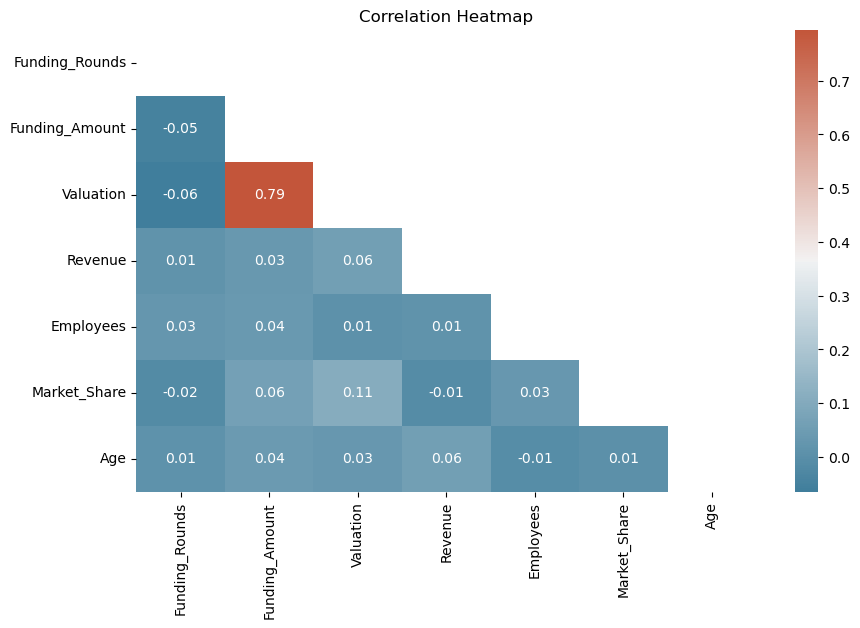

In [25]:
plt.figure(figsize=(10,6))
corr = df1[num_cols].corr()
mask= np.triu(np.ones_like(corr,dtype=bool))
cmap= sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap,mask=mask, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# plt.subplots(figsize=(8,6))
# corr=Cars.corr()

# sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
# plt.show()

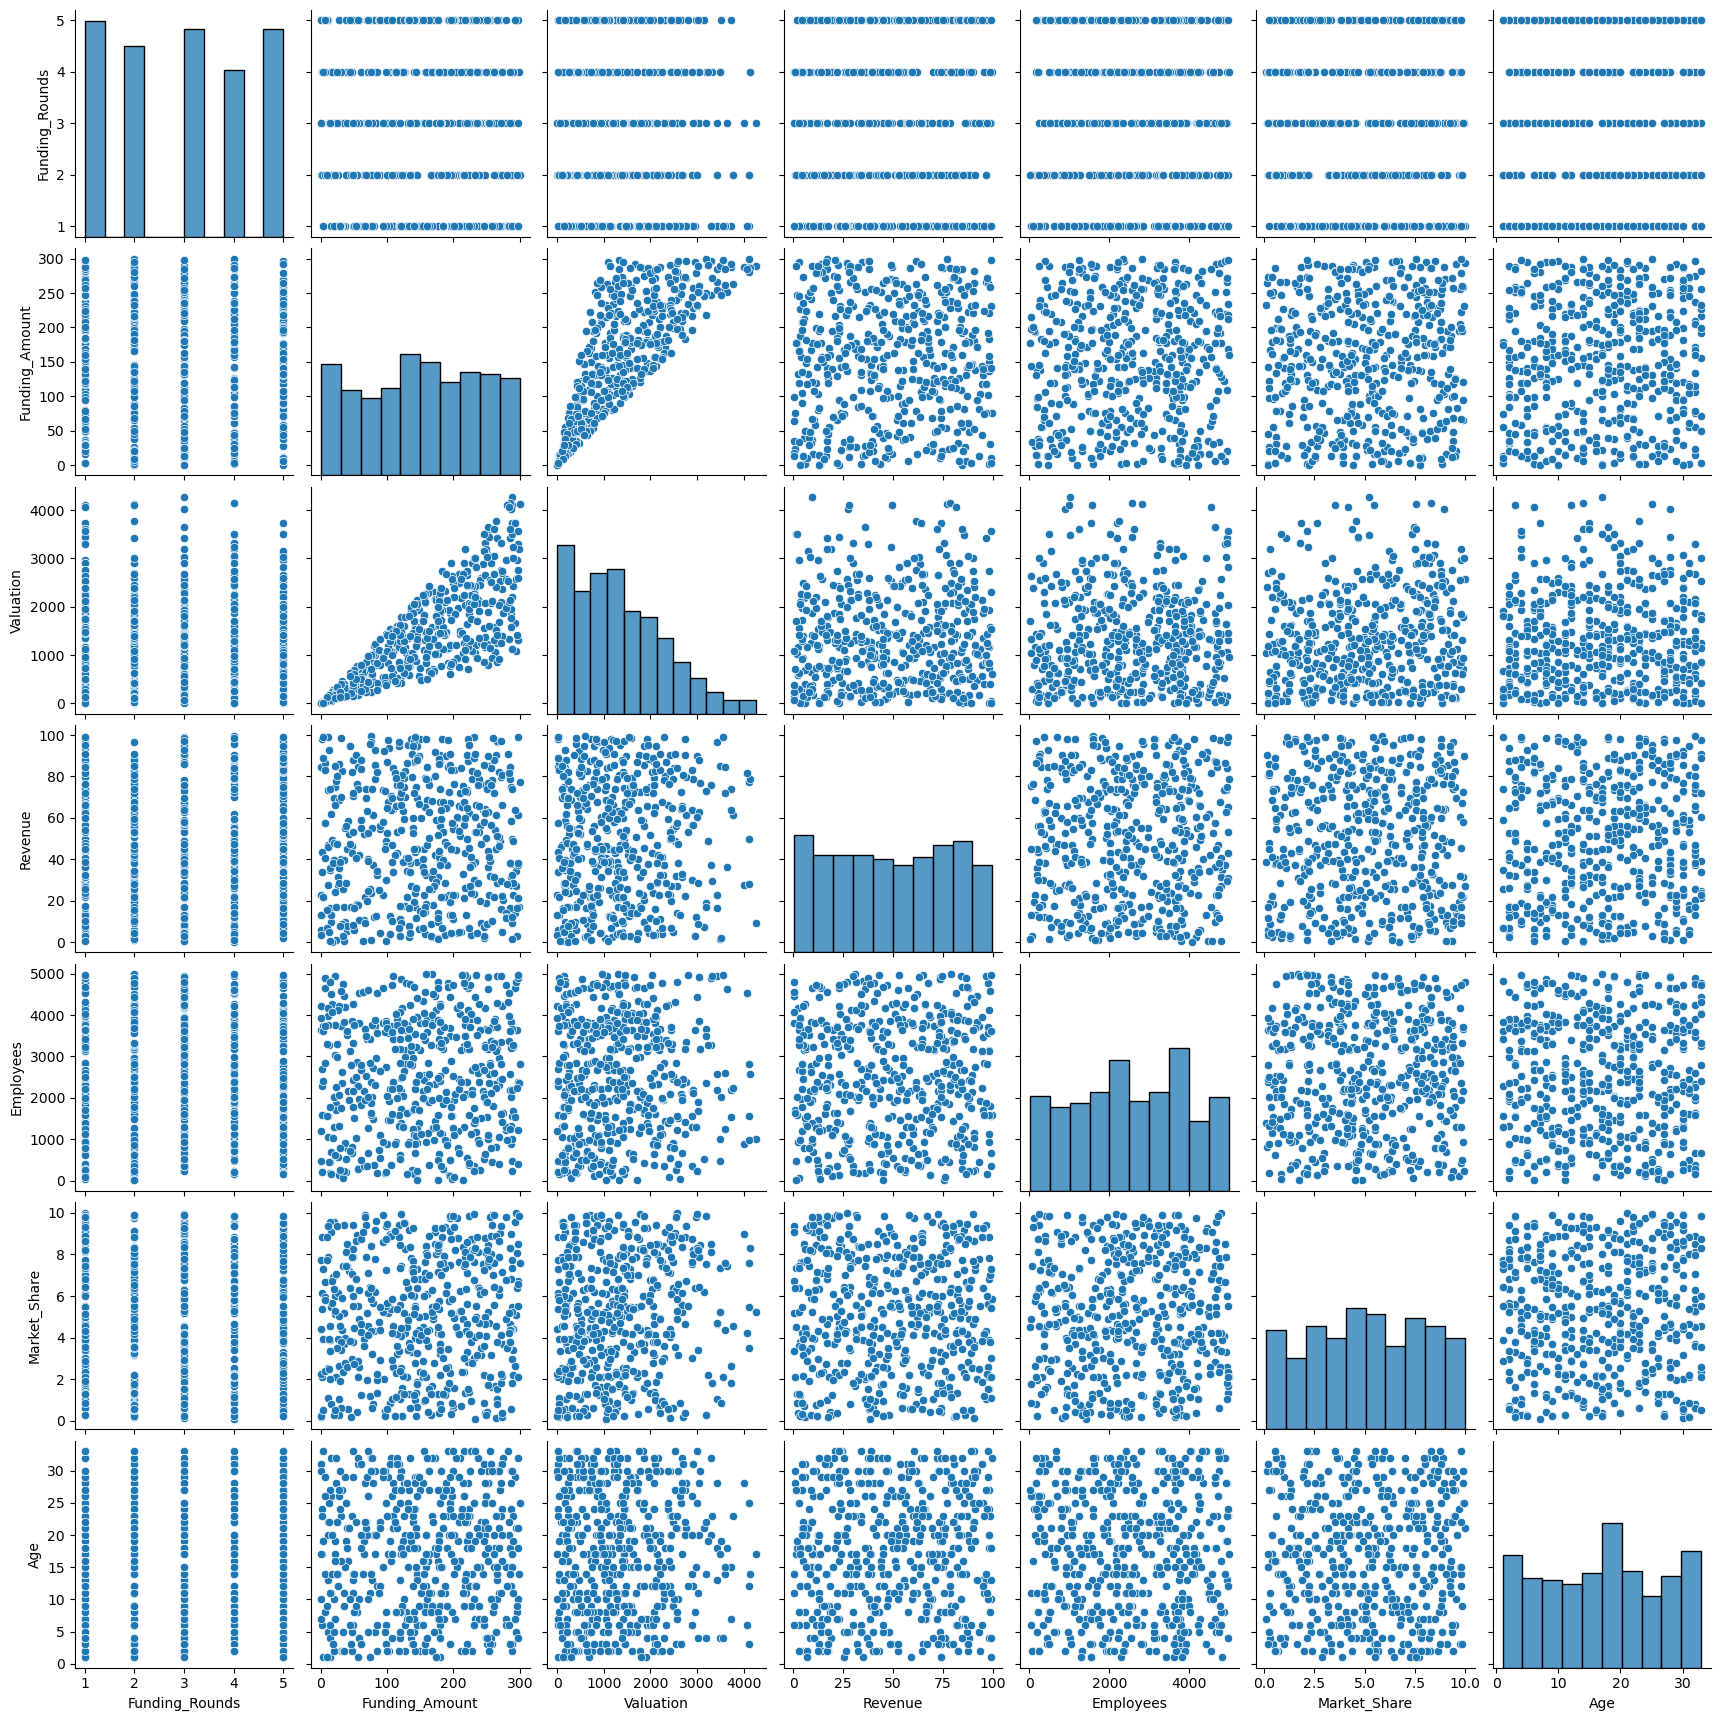

In [26]:
sns.pairplot(df1[num_cols])
plt.show()


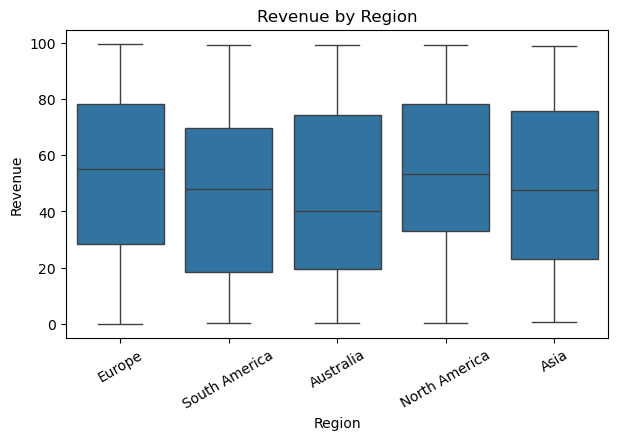

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df1, x='Region', y='Revenue')
plt.title('Revenue by Region')
plt.xticks(rotation=30)
plt.show()


In [28]:
scaler = StandardScaler()
num_cols = ['Funding_Amount','Valuation','Employees','Market_Share','Age']

df1[num_cols] = scaler.fit_transform(df1[num_cols])
df1.describe()


,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Age
count,499.000000,4.990000e+02,4.990000e+02,499.000000,4.990000e+02,4.990000e+02,499.000000,4.990000e+02
mean,2.959920,-1.655323e-16,-8.365608e-17,49.325431,-4.449792e-18,1.067950e-16,0.432866,1.886712e-16
std,1.441774,1.001004e+00,1.001004e+00,29.296859,1.001004e+00,1.001004e+00,0.495970,1.001004e+00
min,1.000000,-1.755896e+00,-1.406964e+00,0.120000,-1.818919e+00,-1.780775e+00,0.000000,-1.715496e+00
25%,2.000000,-8.492333e-01,-8.360705e-01,22.785000,-8.285807e-01,-8.328480e-01,0.000000,-8.571028e-01
50%,3.000000,3.869077e-02,-1.547478e-01,48.890000,-2.467594e-02,1.886084e-02,0.000000,1.290170e-03
75%,4.000000,8.463992e-01,7.054180e-01,74.980000,8.507673e-01,8.759151e-01,1.000000,8.596831e-01
max,5.000000,1.705349e+00,2.991715e+00,99.710000,1.773903e+00,1.747224e+00,1.000000,1.718076e+00


In [29]:
df1=pd.get_dummies(df1,drop_first=True)
df1 = df1.astype({col: int for col in df1.select_dtypes('bool').columns})
df1

,Funding_Rounds,Funding_Amount,Valuation,Revenue,Employees,Market_Share,Profitable,Age,Industry_Cybersecurity,Industry_E-Commerce,...,Industry_FinTech,Industry_Gaming,Industry_HealthTech,Industry_IoT,Region_Australia,Region_Europe,Region_North America,Region_South America,Exit_Status_IPO,Exit_Status_Private
0,1,-0.593203,-0.537727,67.87,-0.766797,0.036679,0,0.001290,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1,1.101678,2.007158,75.65,0.542574,1.070133,1,0.323188,0,0,...,0,0,0,0,0,0,0,1,0,1
2,1,-0.498933,-0.316249,84.21,1.737050,-0.886302,1,1.181580,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5,-1.638146,-1.304315,47.08,-1.062345,-0.914812,0,0.323188,0,0,...,0,1,0,0,0,0,0,1,0,1
4,4,1.120879,-0.532196,50.25,-0.451016,-0.358884,0,0.966982,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,0.341046,1.045189,59.64,0.579427,-1.609720,1,1.396179,0,0,...,0,0,0,0,0,1,0,0,0,1
496,2,-0.520910,0.029673,10.22,-0.221226,0.268315,0,-1.393598,0,0,...,0,0,0,0,0,0,0,1,0,1
497,1,0.091551,-0.891337,84.73,-0.221949,-0.276921,0,-1.393598,0,1,...,0,0,0,0,1,0,0,0,0,1
498,5,0.951657,1.494988,53.16,1.765232,0.154279,0,-0.535205,0,0,...,0,1,0,0,0,1,0,0,0,1


In [31]:
X=df1.drop('Revenue', axis=1)
y=df1['Revenue']
X

,Funding_Rounds,Funding_Amount,Valuation,Employees,Market_Share,Profitable,Age,Industry_Cybersecurity,Industry_E-Commerce,Industry_EdTech,Industry_FinTech,Industry_Gaming,Industry_HealthTech,Industry_IoT,Region_Australia,Region_Europe,Region_North America,Region_South America,Exit_Status_IPO,Exit_Status_Private
0,1,-0.593203,-0.537727,-0.766797,0.036679,0,0.001290,0,0,0,0,0,0,1,0,1,0,0,0,1
1,1,1.101678,2.007158,0.542574,1.070133,1,0.323188,0,0,1,0,0,0,0,0,0,0,1,0,1
2,1,-0.498933,-0.316249,1.737050,-0.886302,1,1.181580,0,0,1,0,0,0,0,0,0,0,1,0,1
3,5,-1.638146,-1.304315,-1.062345,-0.914812,0,0.323188,0,0,0,0,1,0,0,0,0,0,1,0,1
4,4,1.120879,-0.532196,-0.451016,-0.358884,0,0.966982,0,0,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2,0.341046,1.045189,0.579427,-1.609720,1,1.396179,0,0,1,0,0,0,0,0,1,0,0,0,1
496,2,-0.520910,0.029673,-0.221226,0.268315,0,-1.393598,0,0,0,0,0,0,0,0,0,0,1,0,1
497,1,0.091551,-0.891337,-0.221949,-0.276921,0,-1.393598,0,1,0,0,0,0,0,1,0,0,0,0,1
498,5,0.951657,1.494988,1.765232,0.154279,0,-0.535205,0,0,0,0,1,0,0,0,1,0,0,0,1


In [32]:
y

0      67.87
1      75.65
2      84.21
3      47.08
4      50.25
       ...  
495    59.64
496    10.22
497    84.73
498    53.16
499    84.19
Name: Revenue, Length: 499, dtype: float64

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=0)
print("X_train=",X_train.shape,"\nx_test=", X_test.shape)

X_train= (374, 20) 
x_test= (125, 20)


In [34]:
model=LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
print("score", model.score(X_test,y_test))

score -0.12640863687807125


In [36]:
corr = df1[['Funding_Rounds','Funding_Amount','Valuation','Employees','Market_Share','Age','Revenue']].corr()
print(corr['Revenue'].sort_values(ascending=False))


Revenue           1.000000
Age               0.059173
Valuation         0.059161
Funding_Amount    0.033397
Funding_Rounds    0.014461
Employees         0.013203
Market_Share     -0.012612
Name: Revenue, dtype: float64


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
print("RF score:", rf.score(X_test, y_test))


RF score: -0.15476384044147995


In [ ]:
As the score is negative and also in the graph we cant see any relation so we are not doing the next steps.